<a href="https://colab.research.google.com/github/chetan0321/ML_FLASK090/blob/main/insurance_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('/content/Claimants_Data.csv')

In [ ]:
df.shape

(100156, 13)

In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses


<h3>Finding Null values</h3>

In [ ]:
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


<h3>here we removing the rows where Age is 0 years</h3>

In [ ]:
 df = df[df['CLMAGE'] > 18]
 df = df[df['CLMAGE'] < 100]

In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
5,6,0,1.0,1.0,0.0,72,8506.19,Severe,18511.29,1,2550.98,Third-Party,Minor Offenses
7,8,1,0.0,0.0,1.0,21,9646.24,Severe,8686.06,0,6813.06,Third-Party,Minor Offenses


In [ ]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
5,6,0,1.0,1.0,0.0,72,8506.19,Severe,18511.29,1,2550.98,Third-Party,Minor Offenses
7,8,1,0.0,0.0,1.0,21,9646.24,Severe,8686.06,0,6813.06,Third-Party,Minor Offenses
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100150,100151,0,0.0,1.0,0.0,66,8763.35,Minor,4782.59,0,14716.88,Comprehensive,Minor Offenses
100151,100152,0,1.0,1.0,1.0,88,4998.43,Severe,10673.92,1,8921.29,Comprehensive,Minor Offenses
100152,100153,0,1.0,1.0,1.0,89,9925.55,Moderate,6345.22,1,18418.60,Third-Party,Clean
100154,100155,0,0.0,0.0,0.0,50,3302.68,Moderate,1489.38,1,1825.65,Third-Party,Minor Offenses


<h3>Here we need to Label encode the Accident, policy_Type and Driving Records</h3>

In [ ]:
label=LabelEncoder()
df['Accident_Severity']=label.fit_transform(df['Accident_Severity'])
df['Driving_Record']=label.fit_transform(df['Driving_Record'])
df['Policy_Type']=label.fit_transform(df['Policy_Type'])
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1,2,0,1.0,0.0,1.0,19,2464.30,1,4249.17,1,16550.01,0,0
2,3,1,0.0,0.0,1.0,69,15647.05,2,7401.16,0,18019.31,1,2
3,4,1,0.0,0.0,1.0,34,9309.79,1,1034.25,0,6826.58,0,2
5,6,0,1.0,1.0,0.0,72,8506.19,2,18511.29,1,2550.98,1,2
7,8,1,0.0,0.0,1.0,21,9646.24,2,8686.06,0,6813.06,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100150,100151,0,0.0,1.0,0.0,66,8763.35,0,4782.59,0,14716.88,0,2
100151,100152,0,1.0,1.0,1.0,88,4998.43,2,10673.92,1,8921.29,0,2
100152,100153,0,1.0,1.0,1.0,89,9925.55,1,6345.22,1,18418.60,1,0
100154,100155,0,0.0,0.0,0.0,50,3302.68,1,1489.38,1,1825.65,1,2


In [ ]:
scaler = StandardScaler()
df[['LOSS', 'Settlement_Amount',"Claim_Amount_Requested"]] = scaler.fit_transform(df[['LOSS', 'Settlement_Amount','Claim_Amount_Requested']])
df.head()


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1,2,0,1.0,0.0,1.0,19,-1.246309,1,-1.070657,1,1.187018,0,0
2,3,1,0.0,0.0,1.0,69,1.699547,2,-0.508149,0,1.452927,1,2
3,4,1,0.0,0.0,1.0,34,0.283405,1,-1.644396,0,-0.572690,0,2
5,6,0,1.0,1.0,0.0,72,0.103830,2,1.474579,1,-1.346472,1,2
7,8,1,0.0,0.0,1.0,21,0.358589,2,-0.278844,0,-0.575137,1,2


<h3>Here we converted from String to numbers And we need To Find outliers in Claim_Amount_Requested  </h3>

In [ ]:
Q1 = df['Settlement_Amount'].quantile(0.25)
Q3 = df['Settlement_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = df[(df['Settlement_Amount'] < lower_bound)]
outliers2

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['Claim_Amount_Requested'].quantile(0.25)
Q3 = df['Claim_Amount_Requested'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Claim_Amount_Requested'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['CLMAGE'].quantile(0.25)
Q3 = df['CLMAGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CLMAGE'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['LOSS'].quantile(0.25)
Q3 = df['LOSS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LOSS'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


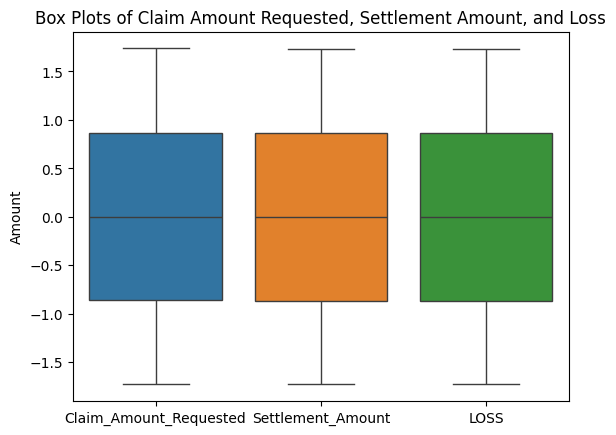

In [ ]:
sns.boxplot(data=df[['Claim_Amount_Requested', 'Settlement_Amount', 'LOSS']])
plt.title('Box Plots of Claim Amount Requested, Settlement Amount, and Loss')
plt.ylabel('Amount')
plt.show()

<h3> Here we Don't have any outliers here</h3>

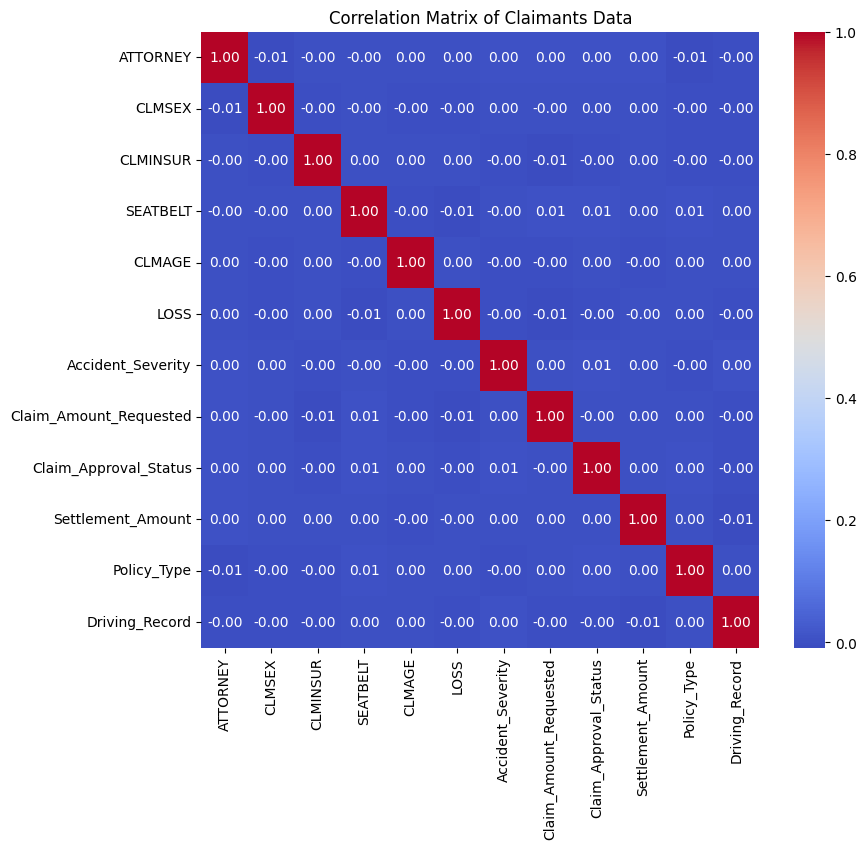

In [ ]:
DATA = df.drop('CASENUM',axis=1)
plt.figure(figsize=(9, 8))
sns.heatmap(DATA.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Claimants Data')
plt.show()

In [ ]:

X = df.drop(['ATTORNEY', 'CASENUM'], axis=1)
y = df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix


Accuracy: 0.5037429819089208
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      7892
           1       0.51      0.50      0.51      8138

    accuracy                           0.50     16030
   macro avg       0.50      0.50      0.50     16030
weighted avg       0.50      0.50      0.50     16030

Confusion Matrix:


array([[4002, 3890],
       [4065, 4073]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
conf_matrix_dt


Decision Tree Accuracy: 0.5043668122270742
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      7892
           1       0.51      0.50      0.51      8138

    accuracy                           0.50     16030
   macro avg       0.50      0.50      0.50     16030
weighted avg       0.50      0.50      0.50     16030

Decision Tree Confusion Matrix:


array([[4013, 3879],
       [4066, 4072]])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming 'ATTORNEY' is your target variable and 'CASENUM' is an ID column
X = df.drop(['ATTORNEY', 'CASENUM'], axis=1)
y = df['ATTORNEY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=1, min_samples_split=7, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
conf_matrix_rf

Random Forest Accuracy: 0.4959451029320025
              precision    recall  f1-score   support

           0       0.49      0.55      0.52      7892
           1       0.50      0.44      0.47      8138

    accuracy                           0.50     16030
   macro avg       0.50      0.50      0.49     16030
weighted avg       0.50      0.50      0.49     16030

Random Forest Confusion Matrix:


array([[4345, 3547],
       [4533, 3605]])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'ATTORNEY' is your target variable and 'CASENUM' is an ID column
X = df.drop(['ATTORNEY', 'CASENUM'], axis=1)
y = df['ATTORNEY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, enable_categorical=True)  # Create XGBClassifier object, enable categorical features
xgb_classifier.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

print(classification_report(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:")
conf_matrix_xgb

XGBoost Accuracy: 0.49713038053649405
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      7892
           1       0.50      0.49      0.50      8138

    accuracy                           0.50     16030
   macro avg       0.50      0.50      0.50     16030
weighted avg       0.50      0.50      0.50     16030

XGBoost Confusion Matrix:


array([[3963, 3929],
       [4132, 4006]])

In [ ]:
# Assuming 'df' is your DataFrame with preprocessed data

# Feature Engineering

# 1. Interaction Features
df['CLMAGE_LOSS_interaction'] = df['CLMAGE'] * df['LOSS']

# 2. Polynomial Features
df['CLMAGE_squared'] = df['CLMAGE'] ** 2

# 3. Binning
df['CLMAGE_bins'] = pd.cut(df['CLMAGE'], bins=[18, 30, 45, 60, 100], labels=[0, 1, 2, 3])  # Numerical labels for bins

# 4. Domain-Specific Features (Example)
df['High_Severity_Accident'] = (df['Accident_Severity'] > 2).astype(int)

In [ ]:
!pip install scikit-learn xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'ATTORNEY' is your target variable and 'CASENUM' is an ID column
X = df.drop(['ATTORNEY', 'CASENUM'], axis=1)
y = df['ATTORNEY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test = scaler.transform(X_test)       # Transform testing data using the fitted scaler

# Create the stacking classifier with XGBoost
stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),  # Enable probability estimates for SVM
        ('xgb', XGBClassifier(random_state=42, enable_categorical=True))  # Replace Decision Tree with XGBoost
    ],
    final_estimator=LogisticRegression(random_state=42)
)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stack_model.predict(X_test)

ERROR: Operation cancelled by user


NameError: name 'df' is not defined